# Prediksi *Congestion Level* pada Lalu Lintas di Kota Bogor

*Problem Statement*:
Kita akan melakukan prediksi Traffic Congestion Level berdasarkan dataset dari aplikasi WAZE untuk Kota Bogor.

# *Data Cleaning*

*Data Cleaning* adalah proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar.

## *Load Library*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## *Load Dataset*

In [2]:
# Directory tempat penyimpanan dataset dan hasil cleaning
PATH_DATA_INTERIM='../data/interim/'


In [3]:
# load dataset menggunakan pandas
data1 = pd.read_csv(PATH_DATA_INTERIM+'data_interim.csv')

In [4]:
# tampilan data frame
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18527 entries, 0 to 18526
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                18527 non-null  object 
 1   hour                18527 non-null  int64  
 2   day_name            18527 non-null  int64  
 3   is_weekdays         18527 non-null  int64  
 4   is_am               18527 non-null  int64  
 5   is_Rush_Hour        18527 non-null  int64  
 6   longitude           18527 non-null  float64
 7   latitude            18527 non-null  float64
 8   median_length       18527 non-null  float64
 9   median_delay        18527 non-null  float64
 10  median_speed_kmh    18527 non-null  float64
 11  level               18527 non-null  int64  
 12  type_ACCIDENT       18527 non-null  int64  
 13  type_JAM            18527 non-null  int64  
 14  type_ROAD_CLOSED    18527 non-null  int64  
 15  type_WEATHERHAZARD  18527 non-null  int64  
dtypes: f

## *Descriptive Statistics*

Descriptive Statistics adalah proses *data analytics* untuk mendapatkan gambaran umum dari dataset

In [5]:
data1.describe()

,hour,day_name,is_weekdays,is_am,is_Rush_Hour,longitude,latitude,median_length,median_delay,median_speed_kmh,level,type_ACCIDENT,type_JAM,type_ROAD_CLOSED,type_WEATHERHAZARD
count,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000
mean,13.919253,3.391051,0.377935,0.358018,0.577374,106.787882,-6.579034,825.520079,169.022724,12.263262,2.857883,0.008150,0.696173,0.106601,0.189075
std,4.553870,1.967399,0.484884,0.479430,0.493990,0.027222,0.025787,577.727413,167.713413,8.759104,1.165807,0.089913,0.459921,0.308614,0.391579
min,0.000000,0.000000,0.000000,0.000000,0.000000,106.729417,-6.681386,14.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,0.000000,0.000000,0.000000,106.762043,-6.596657,394.000000,78.000000,5.495000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,4.000000,0.000000,0.000000,1.000000,106.795109,-6.569422,706.000000,113.500000,10.815001,3.000000,0.000000,1.000000,0.000000,0.000000
75%,17.000000,5.000000,1.000000,1.000000,1.000000,106.806171,-6.561997,1158.000000,202.500000,18.010000,4.000000,0.000000,1.000000,0.000000,0.000000
max,23.000000,6.000000,1.000000,1.000000,1.000000,106.851214,-6.512239,7105.000000,2167.500000,58.980000,5.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Mengelompokan *features* yang bersifat numerik
num_cols = data1[["median_length","median_delay","median_speed_kmh"]].columns.to_list()
print(num_cols)

['median_length', 'median_delay', 'median_speed_kmh']


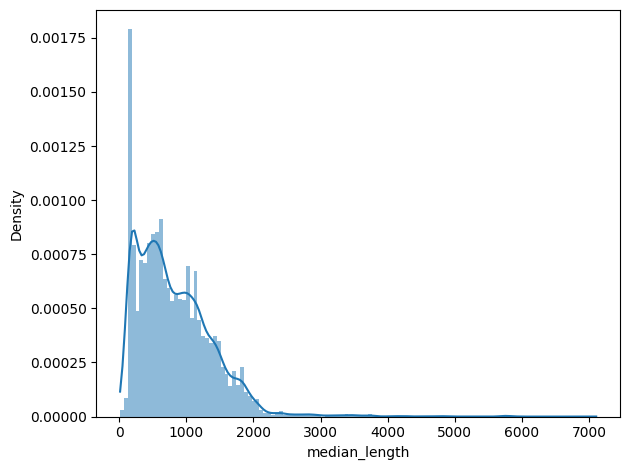

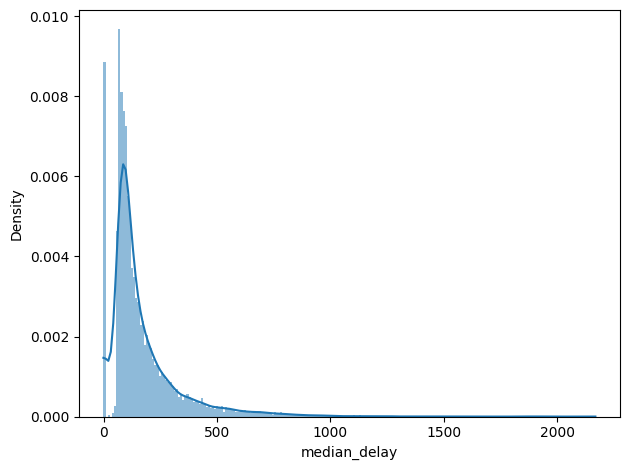

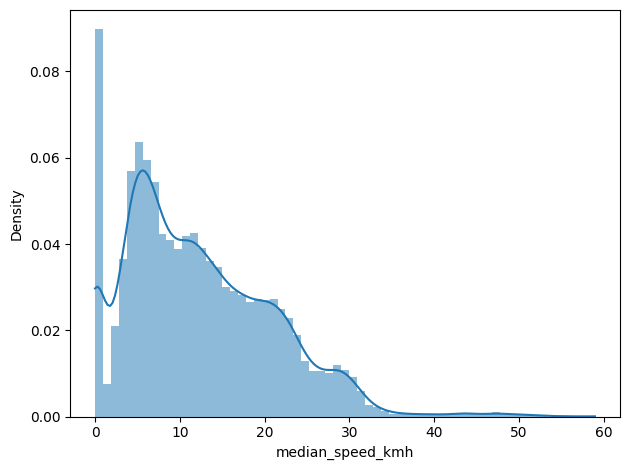

In [7]:
# Melihat persebaran data menggunakan histogram
for col in num_cols:
  sns.histplot(data1[col], kde=True, stat="density", linewidth=0)
  plt.tight_layout()
  plt.show()

## *Checking Outliers*

Melakukan pemeriksaan nilai *outliers* menggunakan z score, dimana z score adalah ukuran seberapa jauh suatu data dari nilai rata-ratanya dalam satuan standar deviasinya. 

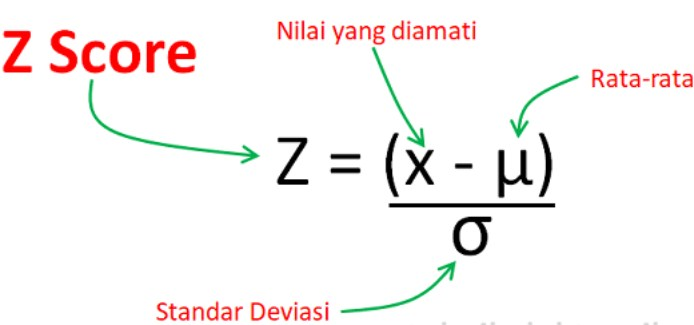


Nilai ambang batas z-score ≥ 3 dikategorikan *outliers*.

In [8]:
#Memeriksa *outliers* dari nilai data yang bersifat numerik menggunakan z score
data1_z = data1[num_cols].copy().add_prefix("z_")
data1_z = data1_z.apply(lambda x: (x - x.mean()) / x.std())
data1_z.head()

,z_median_length,z_median_delay,z_median_speed_kmh
0,-1.139846,-1.013769,-1.400059
1,-1.139846,-1.013769,-1.400059
2,-1.139846,-1.013769,-1.400059
3,-1.139846,-1.013769,-1.400059
4,3.637494,-0.322113,2.182499


In [9]:
# Menentukan index nilai yang *outliers*
outliers_index = []

for col in num_cols:
    outliers_index.extend(data1_z[np.abs(data1_z["z_" + col]) > 3].index.to_list())

outliers_index = list(set(outliers_index))
print(outliers_index)

[4098, 4, 12292, 8198, 12318, 18462, 18465, 12325, 12326, 16429, 16431, 4144, 16433, 18488, 18491, 16449, 2115, 12356, 4165, 16453, 14410, 2126, 10328, 6233, 16485, 16486, 16488, 10345, 10346, 10348, 6263, 10359, 16505, 16506, 16507, 16508, 10371, 16516, 10373, 16520, 16521, 6287, 152, 153, 16539, 12445, 14496, 10401, 14498, 10402, 14510, 14512, 8375, 14525, 14526, 10433, 194, 10438, 4301, 10445, 10446, 10447, 10448, 12493, 16596, 16597, 6360, 220, 224, 12513, 12519, 8425, 12522, 14574, 14576, 16626, 16642, 10508, 10509, 10511, 2321, 273, 2323, 274, 275, 16658, 16664, 16669, 16675, 6437, 6438, 298, 6450, 10548, 16693, 10550, 2358, 4410, 2363, 2367, 8515, 8516, 6476, 16723, 6487, 6498, 8550, 4458, 6519, 16759, 6521, 377, 381, 16773, 16777, 6542, 402, 405, 12699, 2460, 16797, 2461, 6559, 6560, 14751, 12711, 6568, 6571, 16813, 16819, 6579, 14773, 8629, 12727, 14774, 10684, 10685, 12738, 2500, 14791, 6610, 6613, 14807, 4590, 12790, 2551, 504, 505, 14849, 14852, 6663, 14855, 4617, 10761, 16

## *Drop Outliers*

In [10]:
# Menghapus nilai *outliers* berdasarkan indexnya
data1.drop(index=outliers_index, inplace=True)

In [11]:
# tampilan data frame
data1.shape

(17846, 16)

## *Checking Null*

In [12]:
# Memeriksa nilai yang bersifat null
data1.isna().sum()

date                  0
hour                  0
day_name              0
is_weekdays           0
is_am                 0
is_Rush_Hour          0
longitude             0
latitude              0
median_length         0
median_delay          0
median_speed_kmh      0
level                 0
type_ACCIDENT         0
type_JAM              0
type_ROAD_CLOSED      0
type_WEATHERHAZARD    0
dtype: int64

## Menyimpan data yang sudah melalui proses preparasi pada format csv untuk proses *modeling*

In [13]:
# menyimpan hasil data cleaning untuk proses selanjutnya
data1.to_csv(PATH_DATA_INTERIM+'data_interim_clean.csv',index = False)